**Model description** 

We will complete the process in steps



```
# This is formatted as code
```

**Step 1**: Importing libraray

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import tensorflow_hub as hub


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

**Step 2**:
Checking the versions of each componenets 

**a.** Checking the tensorflow version

In [ ]:
print(tf.__version__)

2.4.1


**Step 2**

**b.** Checking GPU version and presence, for fast processing

In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")
    
print( tf.test.gpu_device_name() )

Default GPU Device:/device:GPU:0
/device:GPU:0


**Step 3**: Mounting the dataset with the code
Mounting my drive for uploading my dataset to the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 4**: 
For preprocessing we are cleaning the data from unwanted and undesires elements. 
For that we have two functions:

1. removeHTMLtags(param)
2. clean.text(param)

Function for striping ur email of HTML tags and Non alpha numberic or unwanted spaces. By doing so, we are preparing our data for a smooth tokenizer

In [ ]:
def removeHTMLtags(blob):
     soup = BeautifulSoup(blob,  "html.parser").text
     return soup


    
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
   # print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    return text2.lower()

**Step 5**: Loading the dataset using *pandas* libraray.

.dropna() function is for dropping all the missing values if any. The parameters meaning: 

1. axis=0 if 0, or ‘index’ : Drop rows which contain missing values.
1, or ‘columns’ : Drop columns which contain missing value

2. how='any' : Determine if row or column is removed from DataFrame, when we have at least one NA

3. inplace=True: inplacebool, default False
If True, do operation inplace and return None.

In [ ]:
path_csv="/content/drive/MyDrive/BE Project All Documents/code/Phishing-dataset-decoded.csv"

train_data= pd.read_csv(path_csv)
#train_data= pd.read_csv("/content/drive/MyDrive/BE Project All Documents/code/Phishing-dataset-decode.csv")
print("Training dataset have been uploaded")
print(train_data.shape)
train_data.dropna(axis = 0, how ='any',inplace=True)

print('===========Train Data =========')
print(train_data['Class'].value_counts())
print(len(train_data))
print('==============================\n\n')

train_data['Mail'] = train_data['Mail'].apply(removeHTMLtags)
train_data['Mail'] = train_data['Mail'].apply(clean_text)
print('=====================================================')
print("Training Dataset after Initial steps of preprocessing")
print('=====================================================')
train_data.head()

Training dataset have been uploaded
(209, 2)
===========Train Data =========
phishing    158
ham          51
Name: Class, dtype: int64
209


Training Dataset after Initial steps of preprocessing


,Class,Mail
0,phishing,from infohelpdeskorg returnpath xoriginalto jo...
1,phishing,from servicenonercom returnpath xoriginalto jo...
2,phishing,from acteamcoserver2akingcommy returnpath xori...
3,phishing,from rmtransservisaz returnpath xoriginalto jo...
4,phishing,from femish5vps3164inmotionhostingcom returnpa...


 **Step 6** : Spliting our dataset into training and testing. Here testing dataset is only for validating our model. The splitting percentage for the train and valid dataset is 90:10 or 9:1

In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(
    train_data['Mail'].tolist(), train_data['Class'].tolist(),
    test_size=0.33,stratify = train_data['Class'].tolist(),
    random_state=0)

print(X_train[:1])
print(X_valid[:1])
print(y_train[:1])
print(y_valid[:1])
print("\n")

print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))


['from peifumailmedupennedu returnpath xoriginalto joseloginmonkeyorg deliveredto joseloginmonkeyorg received from forwardbhostedemailcom forwardbhostedemailcom lmonkeyorg postfix with esmtp 1045bf40a2 received from smtpin11hostedemailcom 10519248rfc1918com ofarelay01bhostedemailcom postfix with smtp 9c1af34e34d xforwardedfor josemonkeyorg hostedemail deliveredto josemonkeyorg xfda 7005688225211touch5769a3ba63afc4c authenticationresults authbhostedemailcom dmarcnone headerfrommailmedupennedu authenticationresults authbhostedemailcom dkimnone reasonno signature dkimadspnone insecure policy dkimatpsneutral xspamsummary 100d41d8cd98f00b204peifumailmedupenneduruleshit25390rbl12891251124mailmedupennedulbl8mailshellnet621602 64201201201cacheipnonebayesian050505netchecknonedomaincache0msfnot bulkspffumsbl0dnsblneutralcustomrules000 xhetag touch5769a3ba63afc4c xfilterdrecvdsize received from smtp3netiscupennedu smtp3netiscupennedu imf09bhostedemailcom postfix with esmtp received from mb1zimbra

In [ ]:
x_train=np.asarray(X_train)
x_valid = np.array(X_valid)


In [ ]:
le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))
list(le.classes_)



['ham', 'phishing']

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))

In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

print("==========================================")
print(y_valid[:10])
valid_labels = le.fit_transform(y_valid)
print('Text to number')
print(valid_labels[:10])
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))
print('Number to category')
print(valid_labels[:10])



['phishing', 'phishing', 'phishing', 'phishing', 'phishing', 'phishing', 'ham', 'phishing', 'phishing', 'phishing']
Text to number
[1 1 1 1 1 1 0 1 1 1]
Number to category
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
['phishing', 'phishing', 'phishing', 'ham', 'phishing', 'phishing', 'phishing', 'ham', 'phishing', 'phishing']
Text to number
[1 1 1 0 1 1 1 0 1 1]
Number to category
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:

count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,"\n",label,"\n")
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,"\n",label,"\n")
    if count==5:
        break


======Train dataset ====
tf.Tensor(b'from peifumailmedupennedu returnpath xoriginalto joseloginmonkeyorg deliveredto joseloginmonkeyorg received from forwardbhostedemailcom forwardbhostedemailcom lmonkeyorg postfix with esmtp 1045bf40a2 received from smtpin11hostedemailcom 10519248rfc1918com ofarelay01bhostedemailcom postfix with smtp 9c1af34e34d xforwardedfor josemonkeyorg hostedemail deliveredto josemonkeyorg xfda 7005688225211touch5769a3ba63afc4c authenticationresults authbhostedemailcom dmarcnone headerfrommailmedupennedu authenticationresults authbhostedemailcom dkimnone reasonno signature dkimadspnone insecure policy dkimatpsneutral xspamsummary 100d41d8cd98f00b204peifumailmedupenneduruleshit25390rbl12891251124mailmedupennedulbl8mailshellnet621602 64201201201cacheipnonebayesian050505netchecknonedomaincache0msfnot bulkspffumsbl0dnsblneutralcustomrules000 xhetag touch5769a3ba63afc4c xfilterdrecvdsize received from smtp3netiscupennedu smtp3netiscupennedu imf09bhostedemailcom postfix

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [ ]:
print(x_train[:1])
hub_layer(x_train[:1])

['from peifumailmedupennedu returnpath xoriginalto joseloginmonkeyorg deliveredto joseloginmonkeyorg received from forwardbhostedemailcom forwardbhostedemailcom lmonkeyorg postfix with esmtp 1045bf40a2 received from smtpin11hostedemailcom 10519248rfc1918com ofarelay01bhostedemailcom postfix with smtp 9c1af34e34d xforwardedfor josemonkeyorg hostedemail deliveredto josemonkeyorg xfda 7005688225211touch5769a3ba63afc4c authenticationresults authbhostedemailcom dmarcnone headerfrommailmedupennedu authenticationresults authbhostedemailcom dkimnone reasonno signature dkimadspnone insecure policy dkimatpsneutral xspamsummary 100d41d8cd98f00b204peifumailmedupenneduruleshit25390rbl12891251124mailmedupennedulbl8mailshellnet621602 64201201201cacheipnonebayesian050505netchecknonedomaincache0msfnot bulkspffumsbl0dnsblneutralcustomrules000 xhetag touch5769a3ba63afc4c xfilterdrecvdsize received from smtp3netiscupennedu smtp3netiscupennedu imf09bhostedemailcom postfix with esmtp received from mb1zimbra

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.4924264 , -1.7585531 ,  2.035673  ,  2.3247244 ,  0.22376554,
         0.6830665 ,  1.136721  ,  2.0327764 , -0.26156783, -0.8348308 ,
        -3.5107896 ,  1.917254  , -1.3895117 , -2.0181146 ,  3.8878248 ,
        -2.6105976 , -1.7625376 ,  0.87130046,  0.9797761 , -0.63342786]],
      dtype=float32)>

In [ ]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.Dense(2,activation='sigmoid',kernel_regularizer=regularizers.l2(0.05)))

model1.summary()
model1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
     optimizer='adam',
      metrics=["accuracy"]
      )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                389380    
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 389,750
Trainable params: 389,750
Non-trainable params: 0
_________________________________________________________________


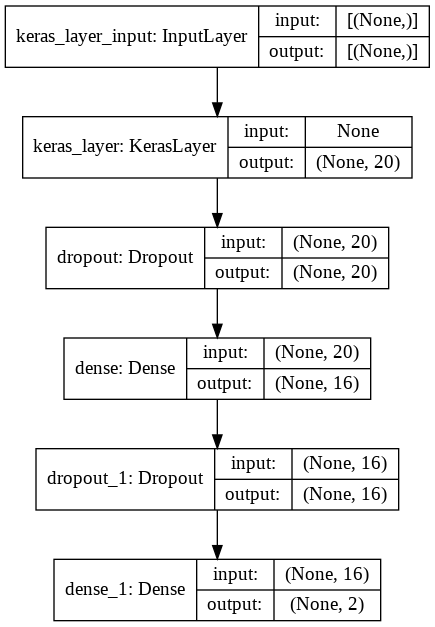

In [ ]:

tf.keras.utils.plot_model(model1, "simpleNN_model.png", show_shapes=True)

In [ ]:
epochs = 20

history = model1.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20
2/2 [==============================] - 2s 393ms/step - loss: 2.1010 - accuracy: 0.6885 - val_loss: 1.4400 - val_accuracy: 0.7971
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 1.9631 - accuracy: 0.6616 - val_loss: 1.4201 - val_accuracy: 0.8261
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 1.9953 - accuracy: 0.6763 - val_loss: 1.4057 - val_accuracy: 0.8261
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 1.9631 - accuracy: 0.6885 - val_loss: 1.3952 - val_accuracy: 0.8261
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 1.7151 - accuracy: 0.7426 - val_loss: 1.3867 - val_accuracy: 0.8261
Epoch 6/20
2/2 [==============================] - 0s 34ms/step - loss: 2.1136 - accuracy: 0.6889 - val_loss: 1.3784 - val_accuracy: 0.8116
Epoch 7/20
2/2 [==============================] - 0s 32ms/step - loss: 2.0031 - accuracy: 0.6932 - val_loss: 1.3700 - val_accuracy: 0.8116
Epoch 8/20
2/2 [==========

In [ ]:
history.history

{'accuracy': [0.6928571462631226,
  0.6642857193946838,
  0.6785714030265808,
  0.6928571462631226,
  0.7428571581840515,
  0.6857143044471741,
  0.699999988079071,
  0.7071428298950195,
  0.7642857432365417,
  0.7785714268684387,
  0.7285714149475098,
  0.7142857313156128,
  0.7714285850524902,
  0.7857142686843872,
  0.800000011920929,
  0.8071428537368774,
  0.7857142686843872,
  0.8357142806053162,
  0.7571428418159485,
  0.7285714149475098],
 'loss': [2.0783355236053467,
  1.9638537168502808,
  1.9792639017105103,
  1.952444076538086,
  1.7171088457107544,
  2.109041213989258,
  2.0003855228424072,
  1.7982417345046997,
  1.6463193893432617,
  1.5965065956115723,
  1.6922119855880737,
  1.696165680885315,
  1.645691156387329,
  1.4639118909835815,
  1.5413005352020264,
  1.5006459951400757,
  1.5583808422088623,
  1.4059431552886963,
  1.5591027736663818,
  1.5333702564239502],
 'val_accuracy': [0.7971014380455017,
  0.8260869383811951,
  0.8260869383811951,
  0.8260869383811951,


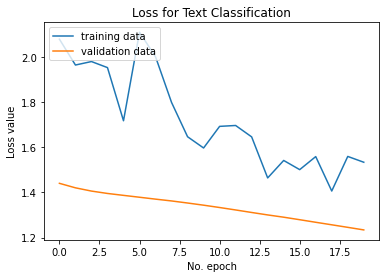

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

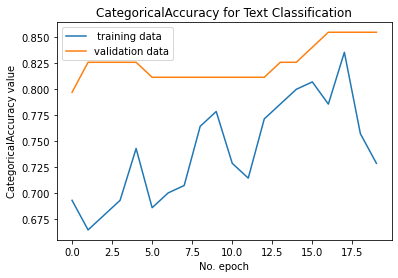

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print("Accuracy:",history.history['accuracy'][-1])
print("Loss:",history.history['loss'][-1])


Accuracy: 0.7285714149475098
Loss: 1.5333702564239502


In [ ]:
from statistics import mean 
  
def Average(lst): 
    return mean(lst)

accuracy = Average(history.history['accuracy']) 

loss = Average(history.history['loss']) 
  
# Printing average of the list 
print("Mean of accuracy =", round(accuracy, 2)) 
print("Mean of loss =", round(loss, 2)) 


Mean of accuracy = 0.74
Mean of loss = 1.72
